In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Airlines.csv')
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5,600,UA,899.0,ORD,IAD,-3
1,5,615,DL,357.0,IAD,ATL,5
2,5,615,UA,341.0,IAD,DEN,8
3,5,625,CO,581.0,IAD,DEN,44
4,5,630,UA,902.0,CLE,IAD,-10
...,...,...,...,...,...,...,...
100156,6,2140,UA,30.0,LAX,IAD,-19
100157,6,2140,CO,896.0,LAX,IAD,-23
100158,6,2150,UA,1094.0,IAD,BDL,-14
100159,6,2155,US,394.0,PIT,IAD,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100161 entries, 0 to 100160
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DayofWeek      100161 non-null  int64  
 1   CRSDepTime     100161 non-null  int64  
 2   UniqueCarrier  100161 non-null  object 
 3   FlightNum      100161 non-null  float64
 4   Origin         100161 non-null  object 
 5   Dest           100161 non-null  object 
 6   ArrDelay       100161 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [4]:
#FlightNum in real world is an integer
df.FlightNum = df.FlightNum.astype(int)

In [5]:
#we remove duplicates
df=df.drop_duplicates()
df.index=range(len(df))
df

,DayofWeek,CRSDepTime,UniqueCarrier,FlightNum,Origin,Dest,ArrDelay
0,5,600,UA,899,ORD,IAD,-3
1,5,615,DL,357,IAD,ATL,5
2,5,615,UA,341,IAD,DEN,8
3,5,625,CO,581,IAD,DEN,44
4,5,630,UA,902,CLE,IAD,-10
...,...,...,...,...,...,...,...
85290,6,2135,UA,1576,IAD,LGA,-19
85291,6,2140,CO,896,LAX,IAD,-23
85292,6,2150,UA,1094,IAD,BDL,-14
85293,6,2155,US,394,PIT,IAD,9


In [6]:
#no null values
df.isnull().any()

DayofWeek        False
CRSDepTime       False
UniqueCarrier    False
FlightNum        False
Origin           False
Dest             False
ArrDelay         False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85295 entries, 0 to 85294
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DayofWeek      85295 non-null  int64 
 1   CRSDepTime     85295 non-null  int64 
 2   UniqueCarrier  85295 non-null  object
 3   FlightNum      85295 non-null  int64 
 4   Origin         85295 non-null  object
 5   Dest           85295 non-null  object
 6   ArrDelay       85295 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 4.6+ MB


## Exploratory Data Analysis

In [8]:
pd.set_option('precision', 2)
df.describe()

,DayofWeek,CRSDepTime,FlightNum,ArrDelay
count,85295.00,85295.00,85295.00,85295.00
mean,3.95,1368.06,897.18,5.70
std,1.98,459.90,476.57,24.86
min,1.00,5.00,12.00,-72.00
25%,2.00,935.00,539.00,-7.00
50%,4.00,1346.00,1000.00,1.00
75%,6.00,1740.00,1264.00,11.00
max,7.00,2359.00,4007.00,667.00


Figure(864x288) AxesSubplot(0.125,0.125;0.352273x0.755) AxesSubplot(0.547727,0.125;0.352273x0.755)


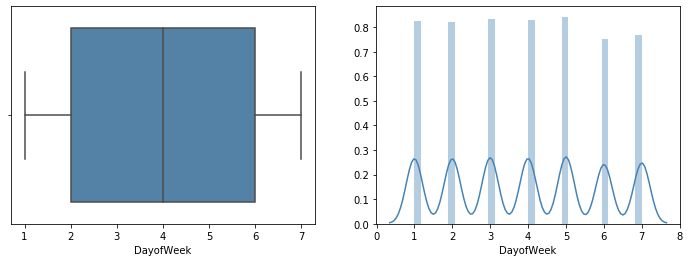

Figure(864x288) AxesSubplot(0.125,0.125;0.352273x0.755) AxesSubplot(0.547727,0.125;0.352273x0.755)


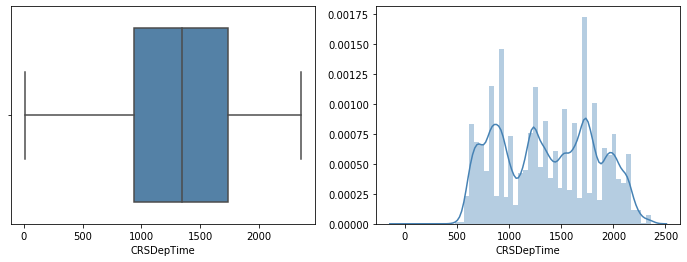

Figure(864x288) AxesSubplot(0.125,0.125;0.352273x0.755) AxesSubplot(0.547727,0.125;0.352273x0.755)


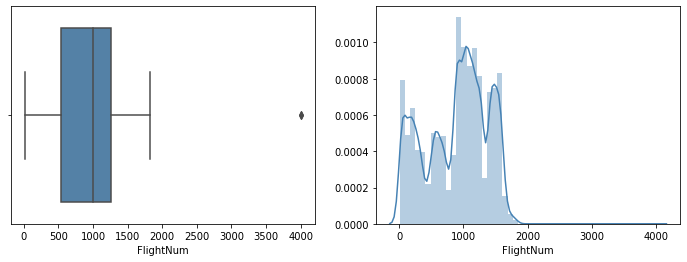

Figure(864x288) AxesSubplot(0.125,0.125;0.352273x0.755) AxesSubplot(0.547727,0.125;0.352273x0.755)


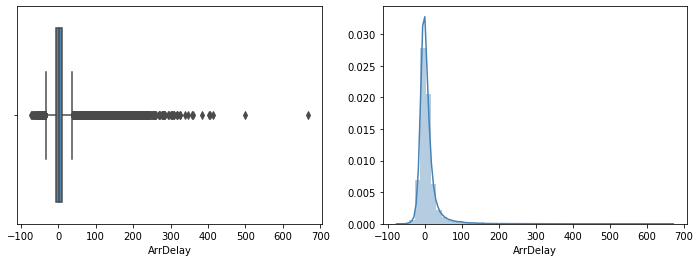

In [9]:
#from dataset we plot only numeric values
for col in df.select_dtypes(include=[np.number]).columns:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
    print(fig,ax1,ax2)
    sns.boxplot(df[col], ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(df[col], kde=True, hist=True, color = 'steelblue', ax = ax2) # histogram
    plt.show();

In [10]:
#FlightNum has one outlier and ArrDelay has some of them
#ArrDelay looks like normal distribution

In [11]:
def count_plot(df,feature):
    plt.figure(figsize=(10,5))
    plt.title(f"CountPlot with {feature} attribute")  
    sns.countplot(x=feature, data=df, color = 'steelblue')

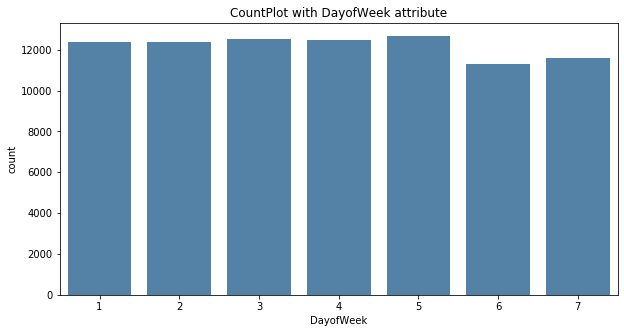

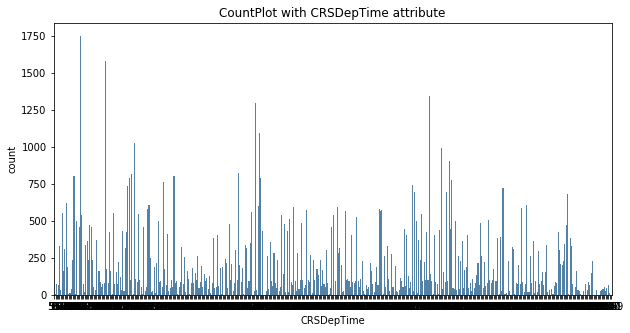

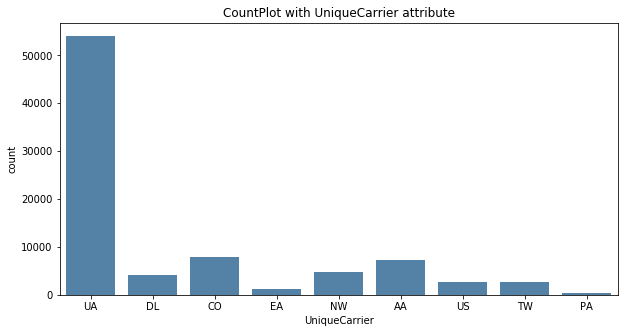

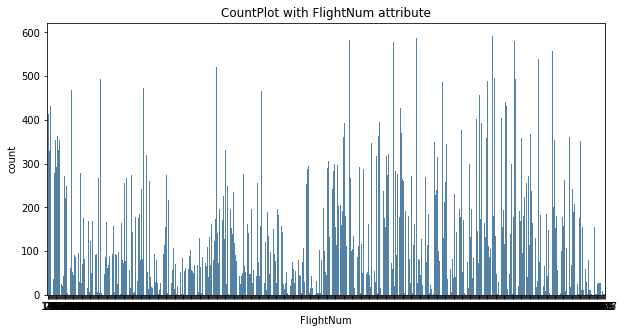

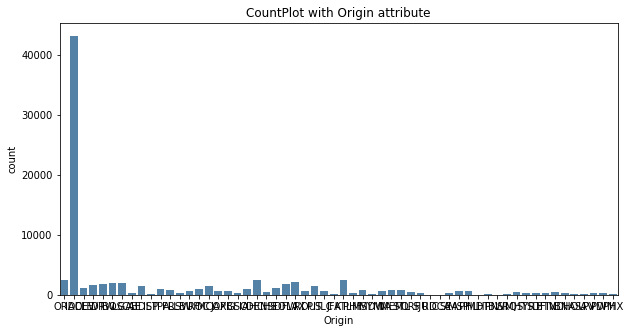

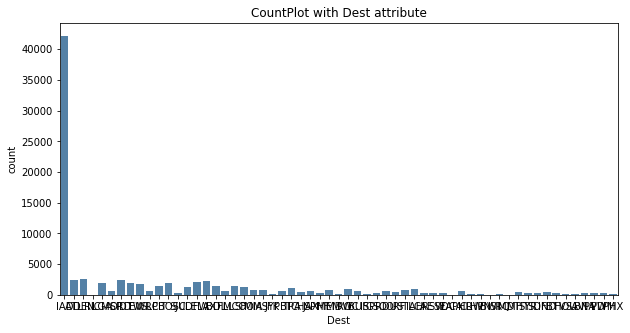

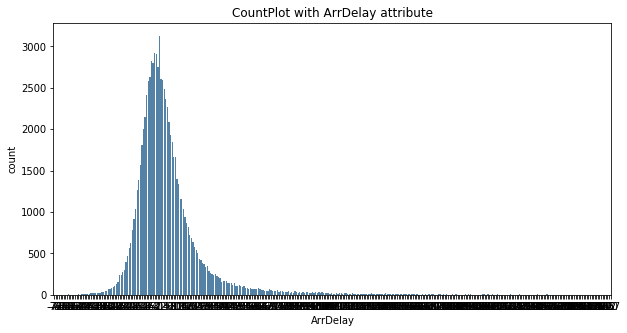

In [12]:
for col in df.columns:
    count_plot(df,col)

In [13]:
#we have balanced values for each day of the week
#we have a lot of values from 5:00am till 23:59pm and we can see that are not balanced
#we can see that we have unbalanced values for the airline companies and for Dest and Origin too.

In [14]:
#scheduled departure time (stored as int)
#we have 424 different dep times
df.CRSDepTime.nunique()

424

In [15]:
df.UniqueCarrier.nunique()

9

In [16]:
df.FlightNum.nunique()

624

In [17]:
df.Origin.nunique()

58

In [18]:
df.Dest.nunique()

59

In [19]:
#this is the price they differ
[i for i in df.Dest.unique() if i not in df.Origin.unique()]

['CRW']

In [20]:
df.ArrDelay.nunique()

350

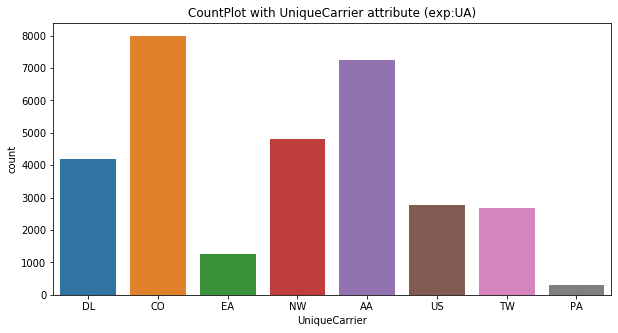

In [21]:
#we remove the first and highest value for best plotting
#but also values are not balanced
plt.figure(figsize=(10,5))
plt.title("CountPlot with UniqueCarrier attribute (exp:UA)")  
sns.countplot(x='UniqueCarrier',data=df[df.UniqueCarrier != 'UA'])

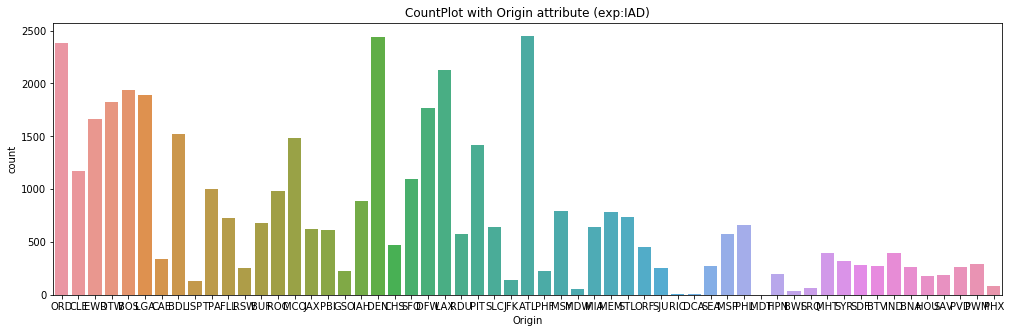

In [22]:
#we remove the first and highest value for best plotting
#but also values are not balanced
plt.figure(figsize=(17,5))
plt.title("CountPlot with Origin attribute (exp:IAD)")  
sns.countplot(x='Origin',data=df[df.Origin != 'IAD'])

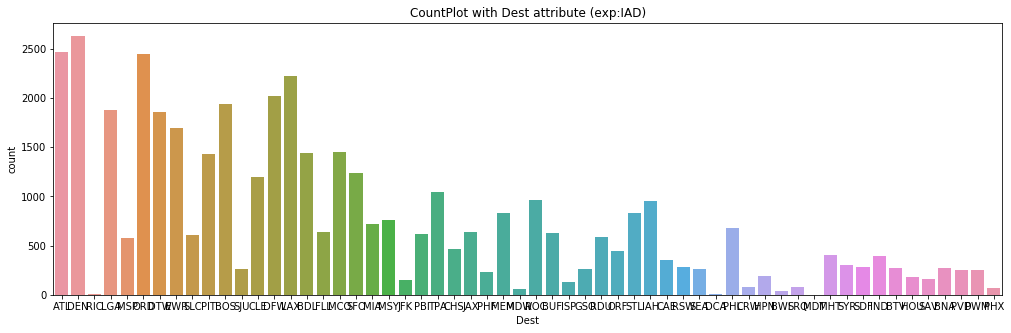

In [23]:
#we remove the first and highest value for best plotting
#but also values are not balanced
plt.figure(figsize=(17,5))
plt.title("CountPlot with Dest attribute (exp:IAD)")  
sns.countplot(x='Dest',data=df[df.Dest != 'IAD'])

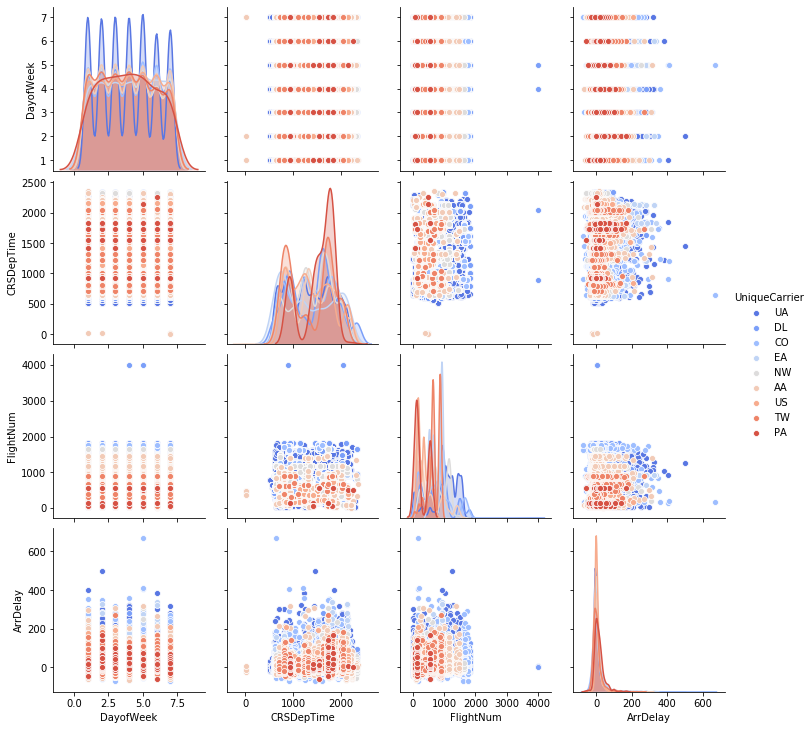

In [24]:
sns.pairplot(df,hue='UniqueCarrier',palette='coolwarm')

In [25]:
#the most outlier values are from UA,DL,CO companies.

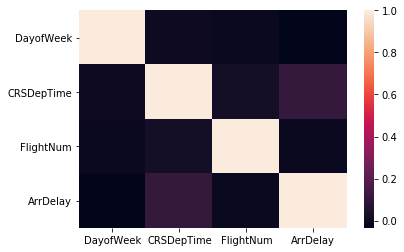

In [26]:
sns.heatmap(df.corr())

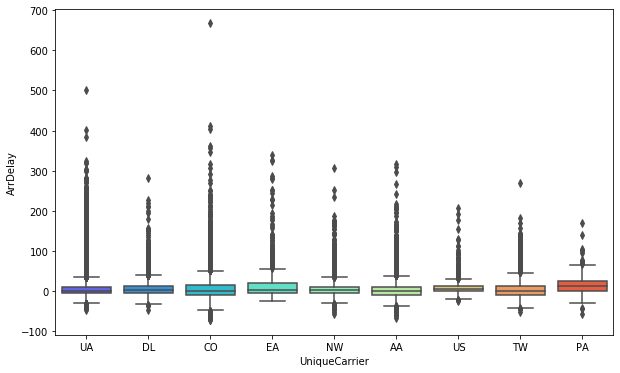

In [27]:
#ArrDelay per Company
plt.figure(figsize=(10,6))
sns.boxplot(x="UniqueCarrier", y="ArrDelay", data=df,palette='rainbow')

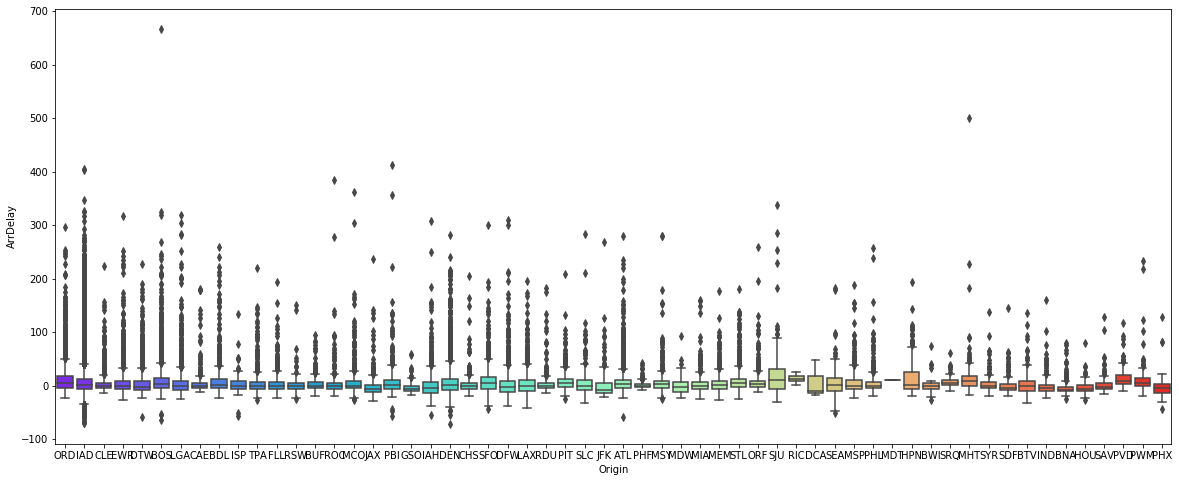

In [28]:
#ArrDelay per Origin Airport
plt.figure(figsize=(20,8))
sns.boxplot(x="Origin", y="ArrDelay", data=df,palette='rainbow')

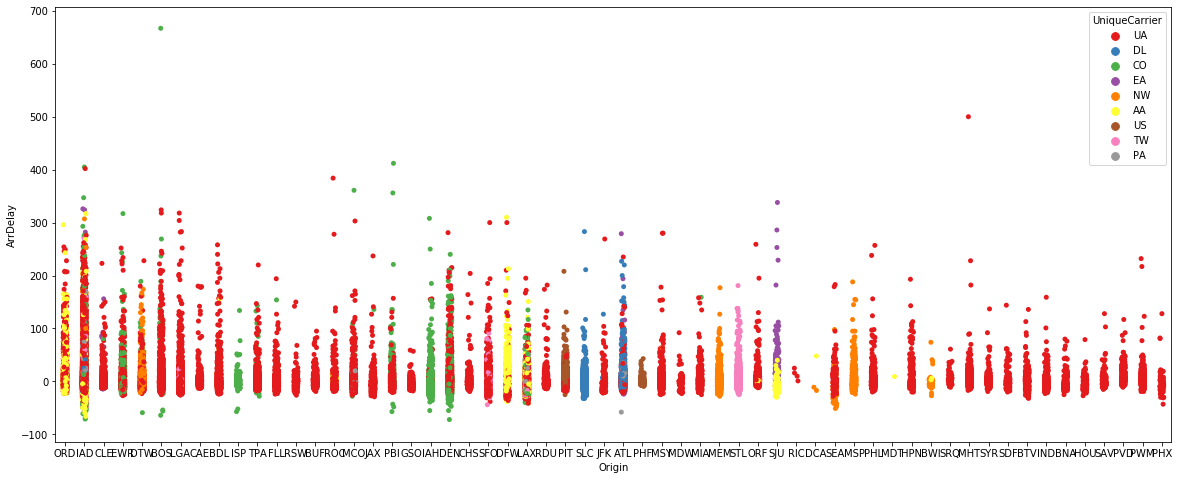

In [29]:
#ArrDelay per Origin Airport per Airline
plt.figure(figsize=(20,8))
sns.stripplot(x="Origin", y="ArrDelay", data=df,jitter=True,hue='UniqueCarrier',palette='Set1')

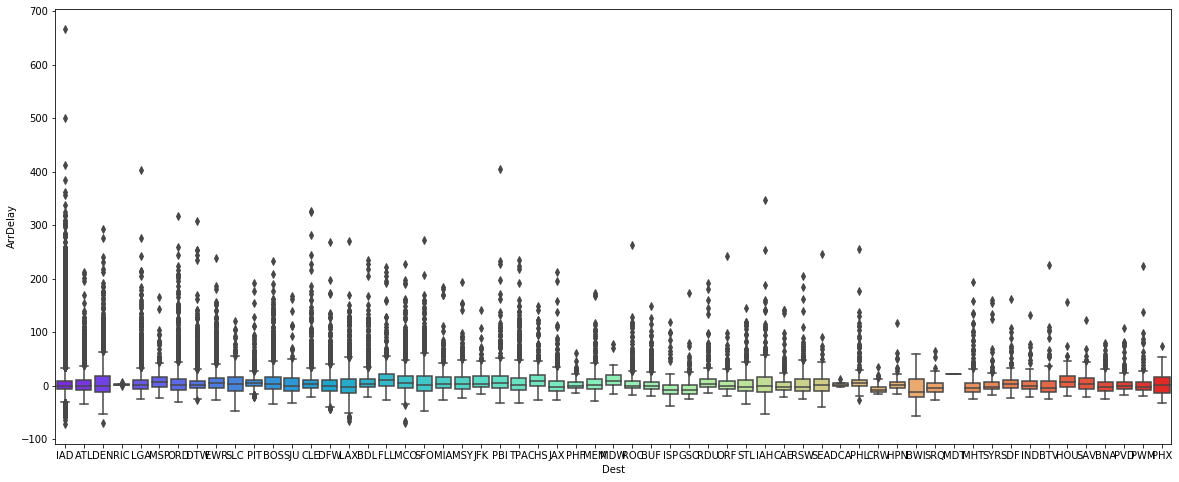

In [30]:
#ArrDelay per Destination Airport
plt.figure(figsize=(20,8))
sns.boxplot(x="Dest", y="ArrDelay", data=df,palette='rainbow')

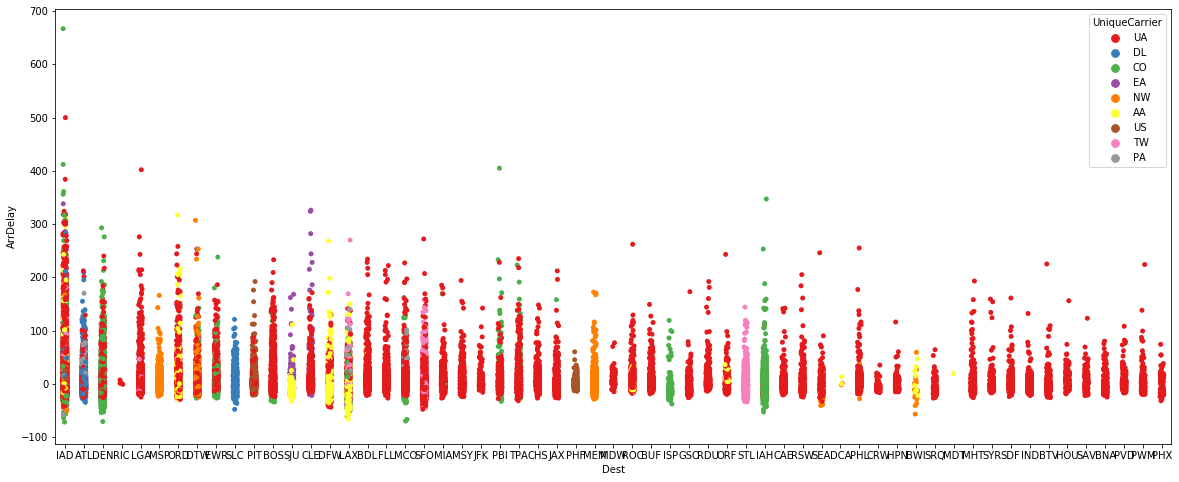

In [31]:
#ArrDelay per Destination Airport per Airline
plt.figure(figsize=(20,8))
sns.stripplot(x="Dest", y="ArrDelay", data=df,jitter=True,hue='UniqueCarrier',palette='Set1')

### Describe the average delays per airport/airline.

In [32]:
#compute average delays per Airline
avg_UC=df.groupby('UniqueCarrier').mean()['ArrDelay']
avg_UC

UniqueCarrier
AA     3.02
CO     6.24
DL     5.90
EA    13.66
NW     5.77
PA    16.32
TW     5.99
UA     5.62
US     7.41
Name: ArrDelay, dtype: float64

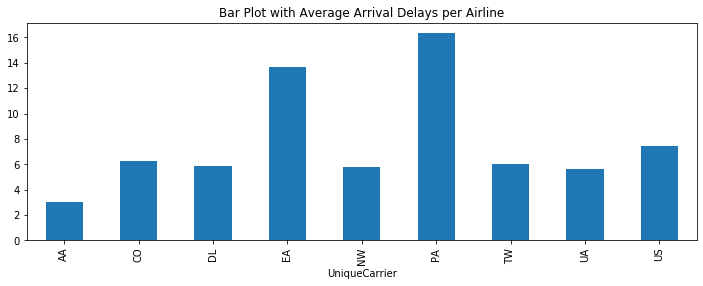

In [33]:
plt.figure(figsize=(12,4))
plt.title("Bar Plot with Average Arrival Delays per Airline")
avg_UC.plot.bar();

In [34]:
#compute average delays per airport origin
avg_UC=df.groupby('Origin').mean()['ArrDelay']
avg_UC

Origin
ATL     6.48
BDL     6.56
BNA    -3.77
BOS    10.79
BTV     1.59
BUF     1.90
BWI     1.52
CAE     6.33
CHS     2.12
CLE     3.00
DCA     6.67
DEN     7.68
DFW     1.24
DTW     3.88
EWR     5.78
FLL     3.25
GSO    -3.50
HOU    -3.90
HPN    14.17
IAD     6.25
IAH     0.19
IND    -2.51
ISP     2.86
JAX    -3.15
JFK     3.43
LAX     1.28
LGA     4.69
MCO     4.39
MDT    11.00
MDW     0.08
MEM     4.18
MHT    11.95
MIA     2.39
MSP     5.99
MSY     6.11
ORD    12.26
ORF     7.46
PBI     7.47
PHF     1.07
PHL     3.94
PHX    -2.06
PIT     7.30
PVD    12.72
PWM     8.79
RDU     2.25
RIC    13.00
ROC     1.94
RSW     1.02
SAV     2.31
SDF    -0.44
SEA     3.32
SFO     7.92
SJU    19.66
SLC     3.27
SRQ     7.09
STL     9.00
SYR     2.55
TPA     3.03
Name: ArrDelay, dtype: float64

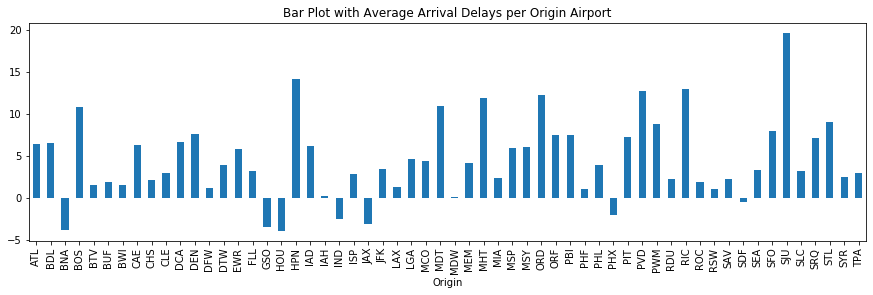

In [35]:
plt.figure(figsize=(15,4))
plt.title("Bar Plot with Average Arrival Delays per Origin Airport")
df.groupby('Origin').mean()['ArrDelay'].plot.bar();

In [36]:
#compute average delays per airport destination
avg_UC=df.groupby('Dest').mean()['ArrDelay']
avg_UC

Dest
ATL     4.07
BDL     8.51
BNA     0.29
BOS     9.85
BTV     1.23
BUF     4.24
BWI    -5.85
CAE     2.30
CHS    12.19
CLE     9.52
CRW    -5.25
DCA     3.00
DEN     6.72
DFW     2.52
DTW     6.02
EWR     9.62
FLL    15.53
GSO    -3.97
HOU     9.11
HPN     2.90
IAD     5.15
IAH     4.19
IND     1.52
ISP    -1.47
JAX     2.68
JFK    10.79
LAX     2.04
LGA     7.10
MCO    10.33
MDT    21.00
MDW    12.15
MEM     5.43
MHT     1.25
MIA     8.10
MSP     8.68
MSY     7.03
ORD     7.12
ORF     3.98
PBI    12.15
PHF     2.17
PHL     7.78
PHX     2.29
PIT     7.43
PVD     2.43
PWM     2.39
RDU     8.54
RIC     2.00
ROC     4.52
RSW     6.86
SAV     6.16
SDF     5.34
SEA     3.20
SFO     7.12
SJU     6.18
SLC     5.27
SRQ    -2.37
STL     2.28
SYR     2.91
TPA     7.99
Name: ArrDelay, dtype: float64

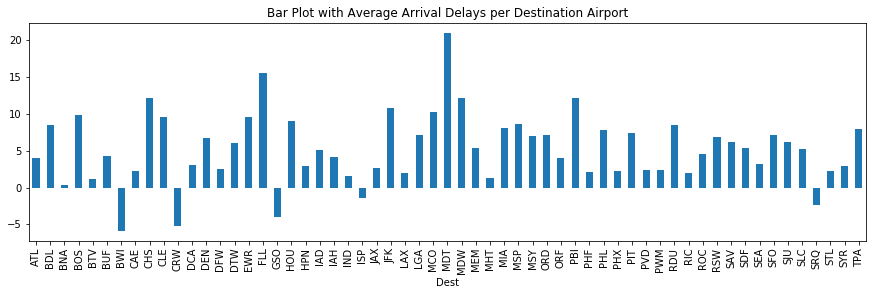

In [37]:
plt.figure(figsize=(15,4))
plt.title("Bar Plot with Average Arrival Delays per Destination Airport")
df.groupby('Dest').mean()['ArrDelay'].plot.bar();

### Identify and report the most prominent rules of association between delays and point of origin AND/OR point of arrival.

In [38]:
#create a dataframe with the attributes that we use
X=pd.DataFrame(df[['ArrDelay','Origin','Dest']])

In [39]:
#create 2 classes and they seperate to 1 value, so we will cut them to 0
pd.DataFrame(np.sort(pd.qcut(X['ArrDelay'], 2).unique()))

,0
0,"(-72.001, 1.0]"
1,"(1.0, 667.0]"


In [40]:
#seperate the attribute ArrDelay to 0 value
for i,j in enumerate (X.ArrDelay):
    if j>0:
        X['ArrDelay'][i]='delay'
    else:
        X['ArrDelay'][i]='no_delay'

In [41]:
#balanced values
X.ArrDelay.value_counts()

delay       43256
no_delay    42039
Name: ArrDelay, dtype: int64

In [42]:
#to seperate Origin from Dest
X.Origin=['Origin_'+i for i in X.Origin]
X.Dest=['Dest_'+i for i in X.Dest]
X

,ArrDelay,Origin,Dest
0,no_delay,Origin_ORD,Dest_IAD
1,delay,Origin_IAD,Dest_ATL
2,delay,Origin_IAD,Dest_DEN
3,delay,Origin_IAD,Dest_DEN
4,no_delay,Origin_CLE,Dest_IAD
...,...,...,...
85290,no_delay,Origin_IAD,Dest_LGA
85291,no_delay,Origin_LAX,Dest_IAD
85292,no_delay,Origin_IAD,Dest_BDL
85293,delay,Origin_PIT,Dest_IAD


In [43]:
#create a list with values for apriori, because it can not run with dataframe
X=X.values.tolist()

In [44]:
from apriori_python import apriori
# Run algorithm
freqItemSet, rules = apriori(X, minSup=0.1, minConf=0.45)

print('Frequent itemsets:')
for key in freqItemSet:
    values = [list(x) for x in freqItemSet[key]]
    print(f'{key}: {values}')

print('\nRules:')
for i,rule in enumerate(rules):
    print(f'{i+1}:{rule[0]} --> {rule[1]}   [conf: {rule[2]}]')

Frequent itemsets:
1: [['Dest_IAD'], ['Origin_IAD'], ['delay'], ['no_delay']]
2: [['Dest_IAD', 'no_delay'], ['Dest_IAD', 'delay'], ['Origin_IAD', 'delay'], ['Origin_IAD', 'no_delay']]

Rules:
1:{'Origin_IAD'} --> {'no_delay'}   [conf: 0.47658913290508104]
2:{'delay'} --> {'Dest_IAD'}   [conf: 0.47822267431107823]
3:{'no_delay'} --> {'Origin_IAD'}   [conf: 0.48885558647922167]
4:{'Dest_IAD'} --> {'delay'}   [conf: 0.49049177218191303]
5:{'Dest_IAD'} --> {'no_delay'}   [conf: 0.509508227818087]
6:{'no_delay'} --> {'Dest_IAD'}   [conf: 0.5111444135207783]
7:{'delay'} --> {'Origin_IAD'}   [conf: 0.5217773256889218]
8:{'Origin_IAD'} --> {'delay'}   [conf: 0.5234108670949189]


In [45]:
#Rules mining
# 1.In 10% and above of the dataset we have Origin from IAD airport, in 47.7% of that we have no_delay
# 2.In 10% and above of the dataset we have delay, in 47.8% of that we have a Destination to IAD airport
# 3.In 10% and above of the dataset we have no delay, in 48.9 of that we have an Origin from IAD airport
# 4.In 10% and above of the dataset we have Destination to IAD airport, in 49% of that we have delay
# 5.In 10% and above of the dataset we have Destination to IAD airport, in 51% of that we have no_delay
# 6.In 10% and above of the dataset we have no_delay, in 51.1% of that we have Destination to IAD airport
# 7.In 10% and above of the dataset we have delay, in 52.1% of that we have Origin from IAD airport
# 8.In 10% and above of the dataset we have Origin from IAD airport, in 52.3% of that we have delay
#as we can see all the rules have to do with the IAD airport

### Try to predict the delay given all other features and report the appropriate performance on cross-validation.

In [46]:
#create dataset with 0 and 1 values to the categorical attributes
Y=pd.get_dummies(df)
X_train=Y.drop('ArrDelay',axis=1)

In [47]:
#seperate the attribute ArrDelay to 0 value
for i,j in enumerate (Y.ArrDelay):
    if j>0:
        Y['ArrDelay'][i]='delay'
    else:
        Y['ArrDelay'][i]='no_delay'
        
y_train=Y.ArrDelay

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#gridsearch to find best values for the parameters 
tree = DecisionTreeClassifier(random_state=101)
grid_param = {'criterion':['gini', 'entropy'], 'max_depth':range(3,8)}
gd_sr = GridSearchCV(estimator=tree,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)
print(gd_sr.best_score_)

{'criterion': 'gini', 'max_depth': 6}
0.5485784629814174


In [49]:
#decision tree classifier
tree = DecisionTreeClassifier(criterion='gini', random_state=10, max_depth=4)

In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
#cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=10)

result = cross_val_score(tree, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("Accuracy: %.3f%% (+/- %f)" % (result.mean()*100, result.std()))

Accuracy: 56.064% (+/- 0.005136)


In [51]:
#prediction from cross validation
preds = cross_val_predict(tree, X_train, y_train, cv=40)

              precision    recall  f1-score   support

       delay       0.58      0.46      0.52     43256
    no_delay       0.54      0.66      0.60     42039

    accuracy                           0.56     85295
   macro avg       0.56      0.56      0.56     85295
weighted avg       0.56      0.56      0.56     85295



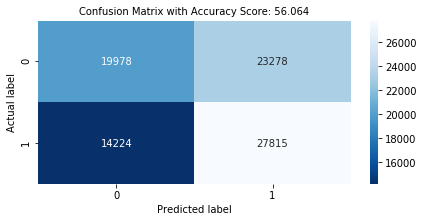

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
#fit tree
tree.fit(X_train, y_train)
#classification report
print(classification_report(y_train,preds))
#confusion matrix on heatmap
matrix = confusion_matrix(y_train,preds)
plt.figure(figsize=(7,3))
sns.heatmap(matrix, annot=True, fmt='.5g', cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = f'Confusion Matrix with Accuracy Score: {result.mean()*100:.3f}'
plt.title(title, size = 10);

### Identify patterns/rules regarding delays and try to explain when delays should be expected, based on these patterns.

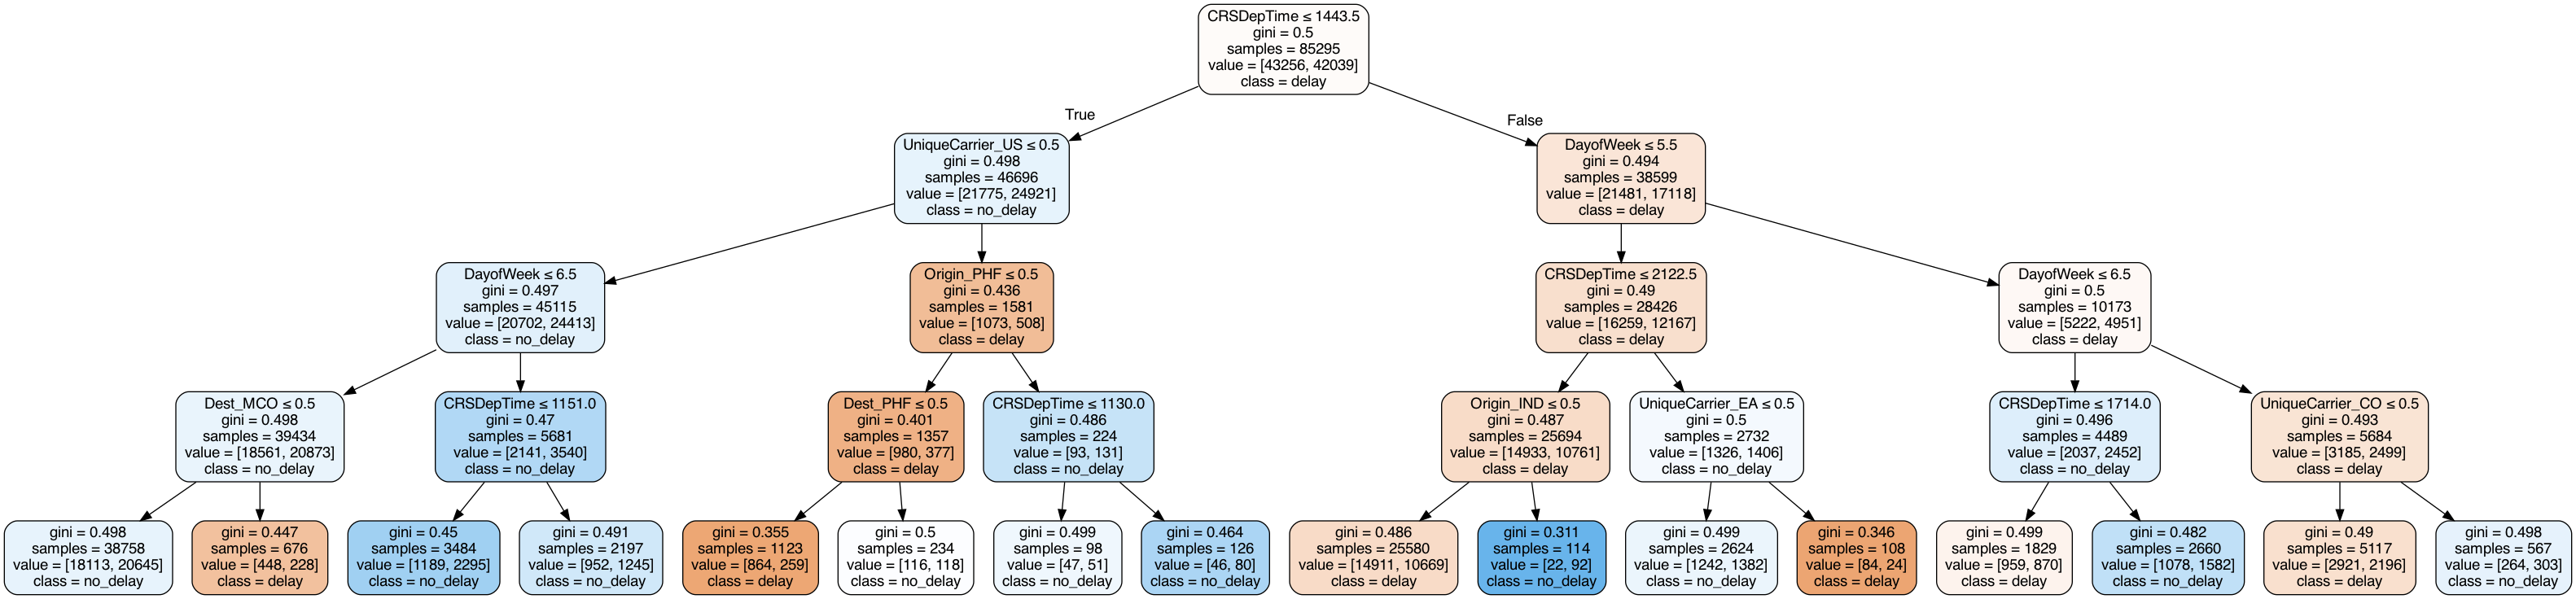

In [53]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus 

#create a list with unique delay values
features=list(Y.drop('ArrDelay',axis=1).columns)

#create a list with unique delay values
classes = ['delay','no_delay']

#Visualization of tree
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data, feature_names=features, class_names=classes,
                filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [54]:
# RULES EXTRACTION

from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=features)
print(tree_rules)

|--- CRSDepTime <= 1443.50
|   |--- UniqueCarrier_US <= 0.50
|   |   |--- DayofWeek <= 6.50
|   |   |   |--- Dest_MCO <= 0.50
|   |   |   |   |--- class: no_delay
|   |   |   |--- Dest_MCO >  0.50
|   |   |   |   |--- class: delay
|   |   |--- DayofWeek >  6.50
|   |   |   |--- CRSDepTime <= 1151.00
|   |   |   |   |--- class: no_delay
|   |   |   |--- CRSDepTime >  1151.00
|   |   |   |   |--- class: no_delay
|   |--- UniqueCarrier_US >  0.50
|   |   |--- Origin_PHF <= 0.50
|   |   |   |--- Dest_PHF <= 0.50
|   |   |   |   |--- class: delay
|   |   |   |--- Dest_PHF >  0.50
|   |   |   |   |--- class: no_delay
|   |   |--- Origin_PHF >  0.50
|   |   |   |--- CRSDepTime <= 1130.00
|   |   |   |   |--- class: no_delay
|   |   |   |--- CRSDepTime >  1130.00
|   |   |   |   |--- class: no_delay
|--- CRSDepTime >  1443.50
|   |--- DayofWeek <= 5.50
|   |   |--- CRSDepTime <= 2122.50
|   |   |   |--- Origin_IND <= 0.50
|   |   |   |   |--- class: delay
|   |   |   |--- Origin_IND >  0.50
| 

In [55]:
#We have class delay, which means DELAY>0 
#1.If (CRSDepTime <= 1443.50) AND (UniqueCarrier_US <= 0.50) AND (DayofWeek <= 6.50) AND (Dest_MCO >  0.50)
#2.If (CRSDepTime <= 1443.50) AND (UniqueCarrier_US >  0.50) AND (Origin_PHF <= 0.50) AND (Dest_PHF <= 0.50)
#3.If (CRSDepTime >  1443.50) AND (DayofWeek <= 5.50) AND (CRSDepTime <= 2122.50) AND (Origin_IND <= 0.50)
#4.If (CRSDepTime >  1443.50) AND (DayofWeek <= 5.50) AND (CRSDepTime >  2122.50) AND (UniqueCarrier_EA >  0.50)
#5.If (CRSDepTime >  1443.50) AND (DayofWeek >  5.50) AND (DayofWeek <= 6.50) AND (CRSDepTime <= 1714.00)
#6.If (CRSDepTime >  1443.50) AND (DayofWeek >  5.50) AND (DayofWeek >  6.50) AND (UniqueCarrier_CO <= 0.50)
#All of them with   THEN class = delay